In [9]:
!pip install matplotlib_venn
!pip install wordcloud

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from matplotlib_venn import venn3
from wordcloud import WordCloud, STOPWORDS

url = 'https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/14_SeveralIndepLists.csv'
data = pd.read_csv(url, sep=' ')
print(data.shape)
print(data.columns)

(11529, 3)
Index(['artist', 'song', 'word'], dtype='object')


# Wordcloud

var function 0 r.readystate if nekfeu plus a r script r.onreadystatechange comme opts div false you ça c'est si undefined typeof quand j'ai be i'll calling 39383816 cf.showasyncad complete r.onload s.parentnode.insertbefore faire opts.div_id cf_async_ adunit_id above song artist lyrics div_id loaded showad.js showads id document.write window.cf 999999999 else cf_async math.random


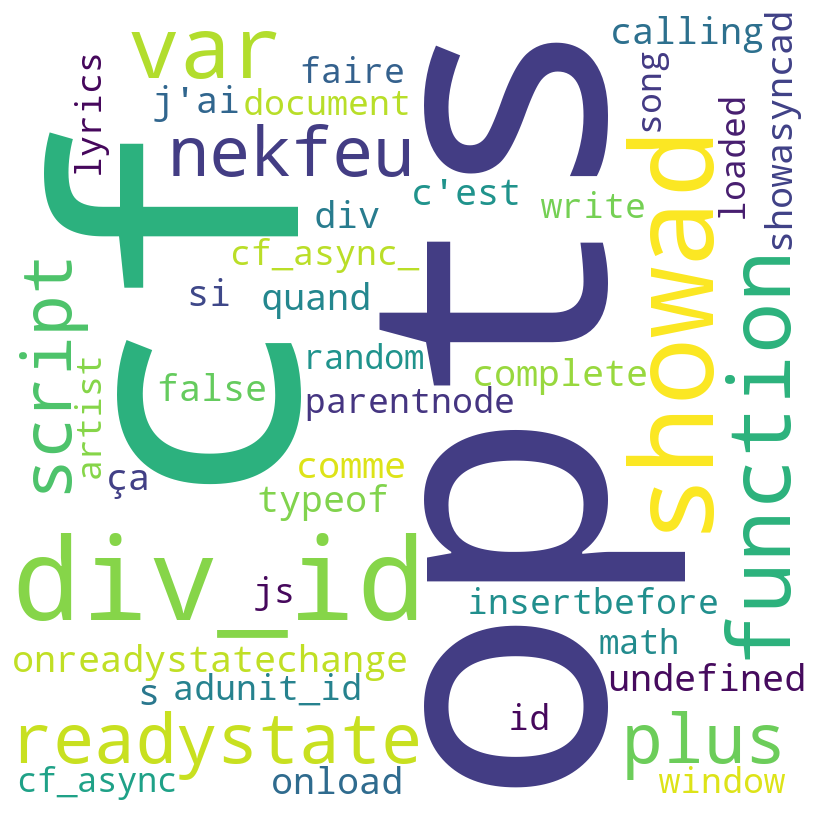

In [11]:
mywords = data[data["artist"] == "nekfeu"]["word"].value_counts().nlargest(50).index

#print(mywords.values)
stopwords = set(STOPWORDS)
text = " ".join(cat for cat in mywords)
print(text)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

# Lollipop Chart

In [38]:
from collections import defaultdict
freq = defaultdict(int)
for word in data['word']:
    freq[word] += 1
unique_words, freqs = list(freq.keys()), list(freq.values())
sorter = sorted(list(zip(freqs, unique_words)))
unique_words, freqs = [si[1] for si in sorter][::-1], [si[0] for si in sorter][::-1]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


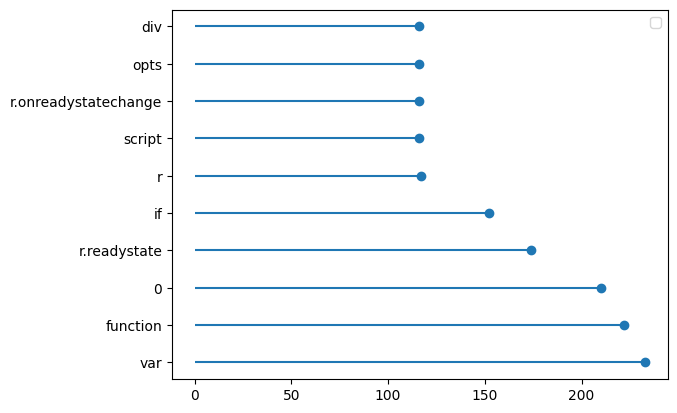

In [43]:
plt.hlines(y = unique_words[:10], xmin=0, xmax=freqs[:10])
plt.plot(freqs[:10], range(10), "o")
plt.legend()
plt.show()

# Venn diagram

In [54]:
np.unique(data['artist'])

array(['booba', 'georges-brassens', 'nekfeu'], dtype=object)

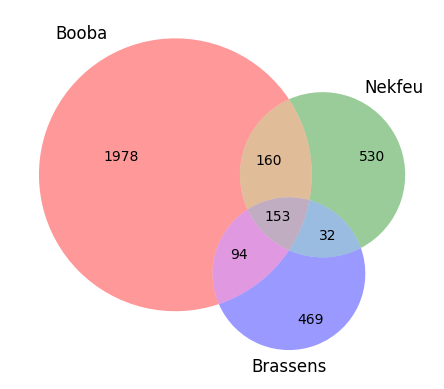

In [55]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

set1 = set([row for row in data[data['artist']=="booba"]['word']] )
set2 = set([row for row in data[data['artist']=="nekfeu"]['word']] )
set3 = set([row for row in data[data['artist']=="georges-brassens"]['word']] )

venn3([set1, set2, set3], ('Booba', 'Nekfeu', 'Brassens'))
plt.show()